Found 29744 images belonging to 5 classes.
Found 17435 images belonging to 5 classes.
Epoch 1/10
930/930 [==============================] - 122s 131ms/step - loss: 1.0910 - accuracy: 0.6083 - val_loss: 0.4935 - val_accuracy: 0.8726
Epoch 2/10
930/930 [==============================] - 117s 126ms/step - loss: 0.2805 - accuracy: 0.9290 - val_loss: 0.3050 - val_accuracy: 0.9203
Epoch 3/10
930/930 [==============================] - 120s 129ms/step - loss: 0.1503 - accuracy: 0.9582 - val_loss: 0.2911 - val_accuracy: 0.9202
Epoch 4/10
930/930 [==============================] - 117s 126ms/step - loss: 0.1204 - accuracy: 0.9655 - val_loss: 0.3552 - val_accuracy: 0.9019
Epoch 5/10
930/930 [==============================] - 117s 126ms/step - loss: 0.1033 - accuracy: 0.9707 - val_loss: 0.3750 - val_accuracy: 0.9077
Epoch 6/10
930/930 [==============================] - 120s 129ms/step - loss: 0.1005 - accuracy: 0.9721 - val_loss: 0.3882 - val_accuracy: 0.8945
Epoch 7/10
930/930 [==================

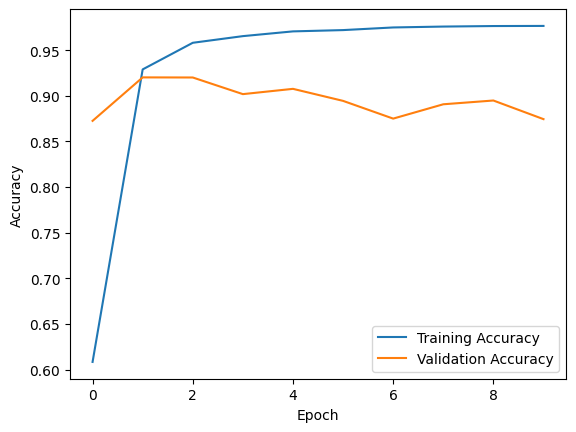

Model saved to trained_model.h5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

from PIL import Image
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Set the paths for training and test data
TRAIN_PATH = '/workspaces/ecg-classification/data/ecg_img/train'
TEST_PATH = '/workspaces/ecg-classification/data/ecg_img/test'

# Load and preprocess the image data
def load_data(train_path, test_path, target_size, batch_size):
    train_data = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    train_generator = train_data.flow_from_directory(
        train_path,
        target_size=target_size,
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_generator = test_data.flow_from_directory(
        test_path,
        target_size=target_size,
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    return train_generator, test_generator

# Define the model architecture
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(4, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Train the model
def train_model(model, train_generator, test_generator, num_epochs):
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

    return history

# Save the model
def save_model(model, filepath):
    model.save(filepath)
    print(f"Model saved to {filepath}")

# Main function
def main():
    # Set the parameters
    target_size = (120, 120)
    batch_size = 32
    num_epochs = 10
    num_classes = 5

    # Load and preprocess the data
    train_generator, test_generator = load_data(TRAIN_PATH, TEST_PATH, target_size, batch_size)

    # Create the model
    input_shape = (target_size[0], target_size[1], 1)
    model = create_model(input_shape, num_classes)

    # Train the model
    history = train_model(model, train_generator, test_generator, num_epochs)

    # Print the model summary
    model.summary()

    # Plot the training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Save the trained model
    save_model(model, 'trained_model.h5')

if __name__ == '__main__':
    main()